# Importing libraries

In [56]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score, train_test_split,learning_curve 
from sklearn.tree import DecisionTreeClassifier 

# Loading train and test data

In [7]:
msg_train = pd.read_csv('train.csv')
msg_train

,label,message,length
0,spam,"['sexy', 'st', 'george', 'day', 'pic', 'jordan...",16
1,ham,"['armand', 'say', 'get', 'as', 'epsilon']",5
2,ham,"['lol', 'i', 'hot', 'air', 'balloon']",5
3,ham,"['you', 'know', 'wot', 'people', 'wear', 't', ...",14
4,ham,"['good', 'morning', 'love', 'i', 'go', 'sleep'...",21
...,...,...,...
4454,ham,"['hi', 'wlcome', 'back', 'wonder', 'got', 'eat...",10
4455,spam,"['ree', 'entry', 'weekly', 'comp', 'chance', '...",18
4456,ham,"['oh', 'fuck', 'juswoke', 'up', 'in', 'a', 'be...",22
4457,ham,"['not', 'much', 'no', 'fights', 'it', 'was', '...",9


In [8]:
msg_test = pd.read_csv('test.csv')
msg_test

,label,message,length
0,ham,"['you', 'still', 'coming', 'tonight']",4
1,ham,"['hey', 'babe', 'far', 'spk', 'at', 'da', 'mo'...",30
2,ham,"['ya', 'even', 'cooky', 'jelly']",4
3,ham,"['sorry', 'gone', 'place', 'tomorrow', 'really...",6
4,ham,"['when', 'going', 'ride', 'bike']",4
...,...,...,...
1110,ham,"['my', 'supervisor', 'find', 'one', 'lor', 'th...",15
1111,spam,"['bored', 'housewife', 'chat', 'n', 'date', 'r...",7
1112,ham,"['rose', 'red', 'red', 'blood', 'blood', 'hear...",36
1113,ham,"['also', 'remember', 'bead', 'come', 'ever']",5


# 1. Naive Bayes Classifier

In [9]:
pipeline = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [10]:

scores = cross_val_score(pipeline,  # steps to convert raw messages into models
                         msg_train['message'],  # training data
                         msg_train['label'],  # training labels
                         cv=10,  # split data randomly into 10 parts: 9 for training, 1 for scoring
                         scoring='accuracy',  # which scoring metric?
                         n_jobs=-1,  # -1 = use all cores = faster
                         )
scores

array([0.95515695, 0.97309417, 0.9573991 , 0.97309417, 0.96412556,
       0.96860987, 0.94843049, 0.97309417, 0.95515695, 0.9505618 ])

In [11]:
scores.mean(), scores.std()

(np.float64(0.9618723232730387), np.float64(0.009203662586574195))

In [15]:
pipeline.fit(msg_train['message'],msg_train['label'])

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [68]:
predictions = pipeline.predict(msg_train['message'])
accuracy_score(msg_train['label'], predictions)

0.9739851984749944

In [69]:
f1_score(msg_train['label'], predictions, pos_label='spam')

0.8901515151515151

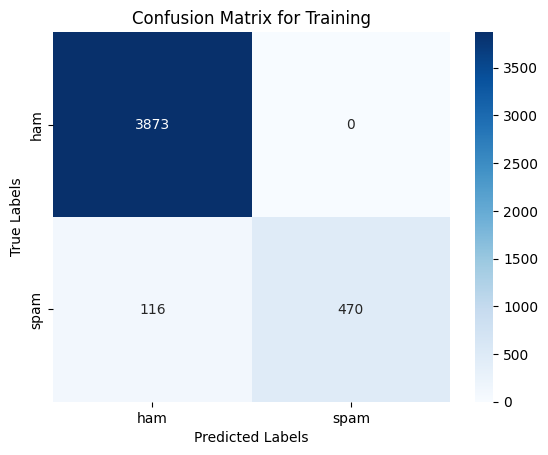

In [70]:
cm = confusion_matrix(msg_train['label'], predictions)
# Plot the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=['ham', 'spam'], yticklabels=['ham','spam'])
plt.title('Confusion Matrix for Training')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [71]:
predictions = pipeline.predict(msg_test['message'])
accuracy_score(msg_test['label'], predictions)

0.9668161434977578

In [72]:
f1_score(msg_test['label'], predictions, pos_label='spam')

0.8701754385964913

In [73]:
cm = confusion_matrix(msg_test['label'], predictions)

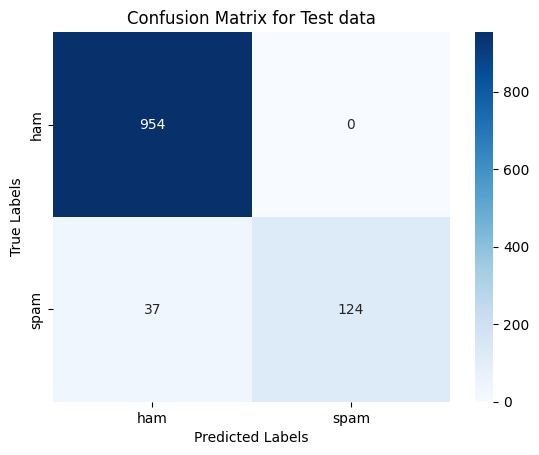

In [75]:
# Plot the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=['ham', 'spam'], yticklabels=['ham','spam'])
plt.title('Confusion Matrix for Test data')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [76]:
print(classification_report(msg_test['label'], predictions))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       954
        spam       1.00      0.77      0.87       161

    accuracy                           0.97      1115
   macro avg       0.98      0.89      0.93      1115
weighted avg       0.97      0.97      0.96      1115



# 2. Support Vector Machines

# 3. Logistic Regression